# Stack Game
## 1. Mathematical Modelisation

### 1.1 Vertices/States
$\newcommand{\supp}{\operatorname{supp}}$
- Let $\mathscr{F}\left(\mathbb{N}^*,\mathbb{N}\right)$ be the set of functions from $\mathbb{N}^*$ to $\mathbb{N}$.
- For $f\in\mathscr{F}\left(\mathbb{N}^*,\mathbb{N}\right),$ we will denote by $\supp f=\{n\in\mathbb{N}^*/f(n)\neq 0\}$ the support of $f$.
- Let $\mathcal{F}$ be the biggest subset of $\mathscr{F}\left(\mathbb{N}^*,\mathbb{N}\right)$ whose elements have finite support:
$\supp f=\{n\in\mathbb{N}^*/f(n)\neq 0\} \text{ is finite}$
- We will denote by $V$ the set of all possible states: $$V=\mathcal{F}$$  
- Every state is an element $f\in \mathcal{F}.$ The value of $f$ at $k\in\mathbb{N}^*$ correspends to the number of times $k$ is present on the stack. It is implemented as a dictionnary <code>values</code> within the class <code>State</code>
> Thanks to the symmetrical nature of the game, it is sufficient to only store how many times each number is repeated on a given state


### 1.2 Edges
- We will define $f\rightarrow g$ if and only if $f$ and $g$ coincides on all of $\mathbb{N}^*$ but three values $i,j,k\in \mathbb{N}^*$. And also:
$$
    \begin{cases}
        i\neq j\\
        k>3\\
        i+j=k\\
        g(i)=f(i)+1\\
        g(j)=f(j)+1\\
        g(k)=f(k)-1
    \end{cases}
$$
This is informally the action of one player splitting a number on the list greater then 3 to two distincts numbers
- Let $E$ be the set of edges: 
$$E=\{(f,g)\in V/f\rightarrow g\}$$
- The adjacency states of each state $f$ can be calculated using the method <code>adjacent_states</code>

> Given $f$ we can uniquely identify an adjacent state using only two parameters $k,i\in\mathbb{N}^* \quad\text{ such that } f(k)>0 \text{ and } i<\frac{k-1}{2}.$ here $k$ is the number a player will chose to split, and $i,k-i$ are the replacements of $k$ with $i < k-i$

### 1.3 Graph of the game:
- Let $\mathcal{C}=\{0,1\} = \mathbb{F}_2$ the set of players.
- For $a\in\mathcal{C}$ we will denote by $\bar a$ the other element.
- Let $\mathcal{V}=\mathcal{C}\times V,\quad \mathcal{V}$ represents a state with a given turn. 
- Let $\mathcal{E}=\left\{\left((c_1,f_1),(c_2,f_2)\right)\in\mathcal{V}^2\quad c_1=\bar c_2 \text{ and } 
\left(f_1,f_2\right)\in E  \right\}.$
- Let $\Psi:\mathcal{V}\rightarrow \mathbb{R}$ be an utility function, which gives the winner if all moves are played perfectly, $\Psi$ is defined recursively:
$$
\begin{align}
\Psi(c,f)&=\begin{cases}
-1 &\text{if } f \text{ is a sink and } c=0\\
1 &\text{if } f \text{ is a sink and } c=1\\
\max_{f\rightarrow g} \Psi(\bar c,g) &\text{ otherwise if } c=0\\
\min_{f\rightarrow g} \Psi(\bar c,g) &\text{ otherwise if } c=1
 \end{cases}
\end{align}
$$
- The graph of all possible games is then:
$$\mathcal{G}=\left(\mathcal{V},\mathcal{E},\Psi\right)$$
- We know that each game begins with a stack containing a unique number, so each game is is a subgraph $\mathcal{G}_n$ of $\mathcal{G}$ spanned by $(0,f_n)$ where $0$ represents the first player and:
$$
f_n:k\rightarrow \delta_{k,n}=\begin{cases}
1 &\text{if }k=n\\
0 &\text{otherwise}
\end{cases}
$$
$\DeclareMathOperator{\card}{card}$
$\DeclareMathOperator{\depth}{depth}$
$\DeclareMathOperator{\branch}{branch}$
with $n$ the initial number

## 2. Theoretical Observations
### 2.1 Definitions
- Let $n\in\mathbb{N}^*$ be the initial number, let $\mathcal{V}_n$ the set of vertices of $\mathcal{G}_n$ and $\mathcal{E}_n$ be its set of edges, Let $V_n$ be the set of states of $\mathcal{V}_n$.
> Note that $\mathcal{V}_n$ represents a state with a given turn

### 2.2 $\sum_{k}f(k)=\depth(f)+1$
- It is clear that from the definition of $f\rightarrow g$ that 
$$\forall (f,g)\in\mathcal{E}, \sum_{k}g(k)=\sum_{k}f(k)+1$$
- So It is clear that
$$
    \forall n \in\mathbb{N}^*,\forall f\in V_n,\quad\sum_{k}f(k)=\depth(f)+1
$$

### 2.3 $\card V_n=\card \mathcal{V}_n$
We have 
$$\forall n\in\mathbb{N}^*\forall f\in V_n,\sum_{k}f(k) = \depth(f)+1$$
Suppose that there exists $f\in\mathcal{V}_n$ such that $(0,f)\in \mathcal{V}_n,(1,f)\in\mathcal{V}_n$, we have then:
1. $\sum_{k}f(k)$ is odd because $(0,f)\in\mathcal{V}_n$.
2. Also $\sum_{k}f(k)$ is even because $(1,f)\in\mathcal{V}_n$. 

Which is a contradiction 

This implies the desired result.

### 2.4 Estimating Number of states
- For each game, The sum of all numbers in a state is invariant:
$$
\forall n\in\mathbb{N},\forall f\in V_n/\sum_{k}kf(k)=n
$$
- This invariant implies that $\card V_n$ can be bounded from above by $\card S_n$ where $$S_n=\left\{(a_k)_{k\in\mathbb{N}}/\quad \sum_{k\in\mathbb{N}}a_k=n\text{ and } a_{k+1}\leq a_k \text{ and } a_k \in\mathbb{N}\right\}$$
- It is proven that $\card S_n=p(n)$ where $p$ is Euler's partition function, in particular:
$$p(n) \sim \frac{1}{4n\sqrt{3}}e^{\pi\sqrt{\frac{2n}{3}}}$$

- We estimate that $p(n)+o(n)\leq \card V_n \leq p(n)$, which will imply:
$$\card\mathcal{V}_n\sim p(n) \sim \frac{1}{4n\sqrt{3}}e^{\pi\sqrt{\frac{2n}{3}}}$$
 
### 2.5 Estimating Number of edges 
$\DeclareMathOperator{\Adj}{Adj}$
- Let $f\in\mathcal{V}_n.$
$$\card \Adj(f) = \sum_{k\in \supp f\backslash\{1,2\}} \lfloor\frac{k-1}{2}\rfloor=\sum_{k\in \supp f} \lfloor\frac{k-1}{2}\rfloor$$
- We have 
$$
\card \Adj(f)\leq \lfloor\frac{n-1}{2}\rfloor
$$
- This implies
$$
\card \mathcal{E}_n=\sum_{f\in\mathcal{V}_n}\card\Adj(f) \leq \lfloor\frac{n-1}{2}\rfloor \card \mathcal{V}_n\leq \lfloor\frac{n-1}{2}\rfloor p(n)
$$
### 2.6 Estimating Complexity
- The depth of every final state $f$ is bounded by:
$$ \frac{n-2}{2}\leq\depth(f)\leq n-2$$
- The branching factor $\branch(f)$ is bounded by:
$$
0\leq \branch(f)\leq \frac{n-1}{2}
$$
- A weak upper bound of the time complexity of Minimax on this game is:
$$ \mathcal{O}\left(n^2\left(\frac{n-1}{2}\right)^{n-2}\right)$$
> Empirical evidence suggests that $\mathcal{O}\left(n^2\left(\frac{n-1}{2}\right)^{\frac{n-2}{2}}\right)$ is a tighter upper bound 
- Using memoization, this time complxity can be reduced to:
$$
\mathcal{O}\left(n^2(\card \mathcal{V}_n+\card\mathcal{E}_n \right))=\mathcal{O}\left(n^2\lfloor\frac{n-1}{2}\rfloor p(n)\right)=\mathcal{O}\left(n^2e^{\pi\sqrt{\frac{2n}{3}}}\right)
$$

> The additional $n^2$ factor is the time taken to calculate the adjacent states for each state

## 3. Implementation
### 3.1 State

In [3]:
from copy import copy
from typing import Union,List,Tuple, Dict
import math
import random
from __future__ import annotations
class State:
    values:dict
    M=int(1e9+7)
    x=random.randrange(2,M)
    def __init__(self, values:Union[Dict[int, int], List[int]]):
        """Initializes a state

        Args:
            values (Union[Dict[int, int], list[int]]): accepts a List of values or a Dictionary
        
        Examples:
            state = State([1,1,1,4,5])
            state = State({ 1:3, 4:1, 5:1 })
        """
        if type(values) is dict:
            self.values=values
        elif type(values) is list:
            self.values={}
            for k in values:
                if k not in self.values:
                    self.values[k]=0
                self.values[k]+=1
        
    def increment_number(self, key:int)->None:
        """Increments the number of elements of a certain key by 1,
        creates it if it doesn't exit

        Args:
            key (int): Our key
        """
        if key not in self.values:
            self.values[key] = 0
        self.values[key]+=1
            
    def decrement_number(self, key:int)->None:
        """Decrements the number of elements of a certain key by 1,
        removes it from the dictionary if none left

        Args:
            key (int): Our key
        """
        self.values[key]-=1
        if self.values[key]==0:
            self.values.pop(key)

    def adjacent_states(self)->List[Tuple[object, Tuple[int, int]]]:
        """Determines the adjacent states and their transition

        Returns:
            List[Tuple[object, Tuple[int, int]]]: List of child states and their transition
        """
        L=[]
        for (k,v) in self.values.items():
            if k in {1,2}:
                continue
            for i in range(1,(k+1)//2):
                S=State(self.values.copy())
                S.decrement_number(k)
                S.increment_number(i)
                S.increment_number(k-i)
                L.append((S,(k,i)))
        return L

    def is_final_state(self)->bool:
        """Checks whether a state is a finale state or not

        Returns:
            bool: True if this state is a final state
        """
        if len(self.values)>2: # a final state has only 1&2 ( which means only 2 keys )
            return False
        for k in self.values:
            if k>2:
                return False
        return True 
                
    def __repr__(self)->str:
        """Returns the Representation of our stack

        Returns:
            str: Returned representation
        """
        s="Stack : "
        for key in sorted(self.values.keys()):
            for i in range(0,self.values[key]):
                s += f"{key} "
        return s     
    
    def __eq__(self, other:State)->bool:
        """Overrides the Default "Equal" operation
        Checks whether this state is equal to another state (All cells are the same)

        Args:
            other (State): The other State

        Returns:
            bool: whether the two states are te same
        """
        if isinstance(other, self.__class__):
            if len(self.values)!=len(other.values):
                return False
            for a in self.values:
                if a not in other.values:
                    return False
                elif self.values[a]!=other.values[a]:
                    return False
            return True
        else: return False
    
    def __hash__(self):
        R=0
        for k,m in self.values.items():
            R=(R+m*(self.x**k))%self.M
        return int(R)
    
    def transform(self, transition:tuple[int, int])->None:
        """Executes a transition on our state

        Args:
            transition (tuple[int, int]): the value to divide + its first sub-value
        """
        value, division = transition
        self.decrement_number(value)
        self.increment_number(division)
        self.increment_number(value - division)


### 3.2 Game Solver
#### 3.2.1 Without Pruning

In [4]:
class BooleanMinimaxSolver:
    def minimax(self,state:State,turn:bool=True)->bool:
        """Solves The State using the Minimax algorithm (boolean approach)

        Args:
            state (State): The State
            turn (bool, optional): Whether it's the turn of Max. Defaults to True.
        """
        for S,transition in state.adjacent_states():
            if turn == self.minimax(S,not turn):
                return turn
        else:
            return not turn

class MinimaxSolver:
    def minimax(self,state:State,turn:bool=True)->tuple:
        """Solves the State using the Naive Minimax Solver.

        Args:
            state (State): The State.
            turn (bool, optional): Whether it's the turn of Max. Defaults to True.
        """
        if state.is_final_state():
            return (-1,[],1) if turn else (1,[],1)
        v=-2 if turn else 2
        move=None
        sequence=[]
        k=1
        for S,transition in state.adjacent_states():
            r,seq,s=self.minimax(S,not turn)
            k+=s
            if turn: # turn of Max
                if r>v:
                    v = r
                    move = transition
                    sequence=seq
            else: # turn of Min
                if r<v:
                    v = r
                    move = transition
                    sequence=seq
            #v=max(v,r) if turn else min(v,r)
        sequence.append(move)
        return (v,sequence,k)
    

class MemoizedMinimaxSolver:
    def __init__(self):
        self.phi={}
    def minimax(self,state:State,turn:bool=True,retLen=True)->tuple:
        """Solves the State using the Minimax Solver ( + memoization ).

        Args:
            state (State): The State.
            turn (bool, optional): Whether it's the turn of Max. Defaults to True.
            retLen (bool, optional): whether we are returning the number of nodes. Defaults to True.
        """
        if tuple([state,turn]) in self.phi:
            if retLen:
                v,path,_=self.phi[(state,turn)]
                return (v,path,len(self.phi))
            else:
                return self.phi[(state,turn)]
        if state.is_final_state():
            self.phi[(state,turn)]=(-1,[],1) if turn else (1,[],1)
            if retLen:
                v,path,_=self.phi[(state,turn)]
                return (v,path,len(self.phi))
            else:
                return self.phi[(state,turn)]
        v=-2 if turn else 2
        move=None
        sequence=[]
        k=1
        for S,transition in state.adjacent_states():
            r,seq,s=self.minimax(S,not turn,retLen)
            k+=s
            if turn: # turn of Max
                if r>v:
                    v = r
                    move = transition
                    sequence=seq
            else: # turn of Min
                if r<v:
                    v = r
                    move = transition
                    sequence=seq
            #v=max(v,r) if turn else min(v,r)
        sequence.append(move)
        self.phi[(state,turn)]=(v,sequence.copy(),k)
        if retLen:
            v,path,_=self.phi[(state,turn)]
            return (v,path,len(self.phi))
        else: return self.phi[(state,turn)]

#### 3.2.2 With $\alpha-\beta$ Pruning

In [5]:
class PruningSolver:
    def __init__(self):
        self.pruning=[]

    def minimax(self,state:State,turn:bool=True,alpha=-math.inf,beta=math.inf)->tuple:
        """Solves a State using alpha-beta pruning

        Args:
            state (State): The State
            turn (bool, optional): if it's True then it's the turn of max, otherwise the turn of min. Defaults to True.
            alpha (numeric, optional): Best current Value for Max. Defaults to -math.inf.
            beta (numeric, optional): Best current Value for Min. Defaults to math.inf.
        """
        if state.is_final_state():
            return (-1,[],1) if turn else (1,[],1)
        v=-math.inf if turn else math.inf
        move=None
        sequence=[]
        k=1

        H = state.adjacent_states()
        visited_adjacents = 0 ; # number of the visited adjacents
        number_adjacents = len(H) # total number of adjacent states
        for S,transition in H:
            if alpha > beta:
                self.pruning.append((state, number_adjacents-visited_adjacents))
                break # Elagage
            r,seq,s=self.minimax(S,not turn,alpha, beta)
            k+=s
            if turn: # Max
                if r>v:
                    v = r
                    move = transition
                    sequence=seq
                    alpha=v
            else: # Min
                if r<v:
                    v = r
                    move = transition
                    sequence=seq
                    beta=v
            visited_adjacents += 1
            #v=max(v,r) if turn else min(v,r)
        sequence.append(move)
        return (v,sequence,k)
    
    
class RandomPruningSolver:
    def minimax(self,state:State,turn:bool=True,alpha=-math.inf,beta=math.inf)->tuple:
        """Solves a State using alpha-beta pruning (starts by choosing a random adjacent state)

        Args:
            state (State): The State
            turn (bool, optional): if it's True then it's the turn of max, otherwise the turn of min. Defaults to True.
            alpha (numeric, optional): Best current Value for Max. Defaults to -math.inf.
            beta (numeric, optional): Best current Value for Min. Defaults to math.inf.
        """
        if state.is_final_state():
            return (-1,[],1) if turn else (1,[],1)
        v=-math.inf if turn else math.inf
        move=None
        sequence=[]
        k=1
        H=state.adjacent_states()
        random.shuffle(H)
        for S,transition in H:
            if alpha > beta:
                break # Elagage
            r,seq,s=self.minimax(S,not turn,alpha, beta)
            k+=s
            if turn: # Max
                if r>v:
                    v = r
                    move = transition
                    sequence=seq
                    alpha=v
            else: # Min
                if r<v:
                    v = r
                    move = transition
                    sequence=seq
                    beta=v
            #v=max(v,r) if turn else min(v,r)
        sequence.append(move)
        return (v,sequence,k)
    
class MemoizedPruningSolver:
    def __init__(self):
        self.phi={}
    def minimax(self,state:State,turn:bool=True,alpha=-math.inf,beta=math.inf,retLen=True)->tuple:
        """Solves a State using alpha-beta pruning (+ memoization)

        Args:
            state (State): The State
            turn (bool, optional): if it's True then it's the turn of max, otherwise the turn of min. Defaults to True.
            alpha (numeric, optional): Best current Value for Max. Defaults to -math.inf.
            beta (numeric, optional): Best current Value for Min. Defaults to math.inf.
            retLen (bool, optional): Whether we are returning the number of nodes or not. Defaults to True.
        """
        if tuple([state,turn]) in self.phi:
            if retLen:
                v,path,_=self.phi[(state,turn)]
                return (v,path,len(self.phi))
            else:
                return self.phi[(state,turn)]
        if state.is_final_state():
            self.phi[(state,turn)]=(-1,[],1) if turn else (1,[],1)
            if retLen:
                v,path,_=self.phi[(state,turn)]
                return (v,path,len(self.phi))
            else:
                return self.phi[(state,turn)]
        v=-math.inf if turn else math.inf
        move=None
        sequence=[]
        k=1
        for S,transition in state.adjacent_states():
            if alpha>beta:
                return (v,sequence,k)
            r,seq,s=self.minimax(S,not turn,alpha,beta,retLen)
            k+=s
            if turn: # turn of Max
                if r>v:
                    v = r
                    move = transition
                    sequence=seq
                    alpha=r
            else: # turn of Min
                if r<v:
                    v = r
                    move = transition
                    sequence=seq
                    beta=r
            #v=max(v,r) if turn else min(v,r)
        sequence.append(move)
        self.phi[(state,turn)]=(v,sequence.copy(),k)
        if retLen:
            v,path,_=self.phi[(state,turn)]
            return (v,path,len(self.phi))
        else: return self.phi[(state,turn)]

    
class RandomMemoizedPruningSolver:
    def __init__(self):
        self.phi={}

    def minimax(self,state:State,turn:bool=True,alpha=-math.inf,beta=math.inf,retLen=True)->tuple:
        """Solves a State using alpha-beta pruning (+ memoization + random adjacent state)

        Args:
            state (State): The State
            turn (bool, optional): if it's True then it's the turn of max, otherwise the turn of min. Defaults to True.
            alpha (numeric, optional): Best current Value for Max. Defaults to -math.inf.
            beta (numeric, optional): Best current Value for Min. Defaults to math.inf.
            retLen (bool, optional): Whether we are returning the number of nodes or not. Defaults to True.
        """
        if tuple([state,turn]) in self.phi:
            if retLen:
                v,path,_=self.phi[(state,turn)]
                return (v,path,len(self.phi))
            else:
                return self.phi[(state,turn)]
        if state.is_final_state():
            self.phi[(state,turn)]=(-1,[],1) if turn else (1,[],1)
            if retLen:
                v,path,_=self.phi[(state,turn)]
                return (v,path,len(self.phi))
            else:
                return self.phi[(state,turn)]
        v=-math.inf if turn else math.inf
        move=None
        sequence=[]
        k=1
        H=state.adjacent_states()
        random.shuffle(H)
        for S,transition in H:
            if alpha>beta:
                return (v,sequence,k)
            r,seq,s=self.minimax(S,not turn,alpha,beta,retLen)
            k+=s
            if turn: # turn of Max
                if r>v:
                    v = r
                    move = transition
                    sequence=seq
                    alpha=r
            else: # turn of Min
                if r<v:
                    v = r
                    move = transition
                    sequence=seq
                    beta=r
            #v=max(v,r) if turn else min(v,r)
        sequence.append(move)
        self.phi[(state,turn)]=(v,sequence.copy(),k)
        if retLen:
            v,path,_=self.phi[(state,turn)]
            return (v,path,len(self.phi))
        else: return self.phi[(state,turn)]

### 3.3 Game

In [6]:
class Game:
    def __init__(self, n:int, solver:object=None, is_player_first=True) -> None:
        """Initializes our Game

        Args:
            n (int): The initial number of elements in the stack
            solver (object, optional): our solver. Defaults to None.
        """
        self.state= State({n:1})
        self.solver = solver
        if solver is None:
            self.solver = MinimaxSolver()
        self.is_player_first = is_player_first
    
    def parse_player_value(self,s:str)->Union[int, bool]:
        """Parses the value input by the player

        Args:
            s (str): user input

        Returns:
            Union[int, bool]: False if there is an error, otherwise the key
        """
        try:
            value = int(s)
            if value not in self.state.values.keys():
                print("Value is invalid!")
                return False
            if value in [1,2]:
                print("Value can't be divided!")
                return False
            return value
        except:
            print("Value is invalid!")
            return False

    def parse_player_division(self, s:str, value:int)->Union[Tuple[int, int], bool]:
        """Parses the two sub-values input by the player

        Args:
            s (str): user input
            value (int): the initial value we want to divide

        Returns:
            Union[Tuple[int, int], bool]: False is there is an error, otherwise the two sub-values
        """
        result = s.strip().replace("  "," ")
        divison = result.split(" ")
        if (len(divison)<2):
            return False
        try:
            first = int(divison[0])
            second = int(divison[1])
            if (not ((first + second == value) and first != second )):
                return False
            return (first,second)
        except:
            return False

    def repr_transition(self, transition:Tuple[int, int])->str:
        """Represents a transitions

        Args:
            transition (Tuple[int, int]): the Transition (value, first_sub_value)

        Returns:
            str: The representation of the transitions
        """
        k,k1 = transition
        return f"{k}->({k1},{k-k1})"
        

    def play(self, is_player_turn:bool=True)->None:
        """Play a turn in the game

        Args:
            is_player_turn (bool, optional): whether it's the player's turn to play. Defaults to True.
        """
        if (is_player_turn):
            valid = False
            first, second = 0, 0
            value = 0
            while(not valid):
                value_input = input("Choose a Stack to divide: ")
                value = self.parse_player_value(value_input)
                if (isinstance(value,bool) and value == False): # value is invalid
                    continue
                division_input = input("Choose first & second stack: ")
                division = self.parse_player_division(division_input, value) 
                if (isinstance(division, bool) and division == False):# sub-values are invalid
                    print("Invalid Division!")
                    continue
                
                first, second = division
                valid = True
            transition = (value, first)
            self.state.transform(transition)
            print(f"You played {self.repr_transition(transition)}")
                
        else:
            value,L,_ = self.solver.minimax(self.state)
            transition = L[-1]
            self.state.transform(transition)
            print(f"The computer played {self.repr_transition(transition)}")
        print (self.state)
    def play_game(self)->None:
        """Plays the Game
        """
        print(self.state)
        turn = self.is_player_first
        while (not self.state.is_final_state()):
            self.play(turn)
            turn = not turn
        print("You Lose!") if turn else print("You Win!")

### 3.4 Simulation

#### 3.4.1 Minimax Solver

##### 3.4.1.1 Solving a Game

In this Example we will have 2 players:
1. The User
2. The Machine

> Note: the computer is playing perfectly, so it is hard to beat him in non-trivial configurations

In [7]:
game = Game(7, solver=MinimaxSolver(), is_player_first=True)
game.play_game()

Stack : 7 
Choose a Stack to divide: 7
Choose first & second stack: 4 3
You played 7->(4,3)
Stack : 3 4 
The computer played 4->(1,3)
Stack : 1 3 3 
Choose a Stack to divide: 3
Choose first & second stack: 1 2
You played 3->(1,2)
Stack : 1 1 2 3 
The computer played 3->(1,2)
Stack : 1 1 1 2 2 
You Lose!


##### 3.4.1.2 Solving a State

In this example we will solve only one state, and show the **number of the visited nodes**

In [12]:
solver = MinimaxSolver()
value, L, k = solver.minimax(State([15]))
print(list(reversed([f"{k}->({k1},{k-k1})" for (k,k1) in L])))
print(f"Result: {value}")
print(f"Number of visited nodes: {k}")

['15->(3,12)', '3->(1,2)', '12->(2,10)', '10->(1,9)', '9->(2,7)', '7->(1,6)', '6->(2,4)', '4->(1,3)', '3->(1,2)']
Result: 1
Number of visited nodes: 144036


##### 3.4.1.3 Using memoization

In this section we will **memorize** the states that we have already crossed (to avoid checking them twice)

In [13]:
solver = MemoizedMinimaxSolver()
value, L, k = solver.minimax(State([15]))
print(list(reversed([f"{k}->({k1},{k-k1})" for (k,k1) in L])))
print(f"Result: {value}")
print(f"Number of visited nodes: {k}")

['15->(3,12)', '3->(1,2)', '12->(2,10)', '10->(1,9)', '9->(2,7)', '7->(1,6)', '6->(2,4)', '4->(1,3)', '3->(1,2)']
Result: 1
Number of visited nodes: 173


#### 3.4.2 $\alpha-\beta$ Pruning
##### 3.4.2.1 Solving a Game

In [14]:
game = Game(7, solver=PruningSolver(), is_player_first=True)
game.play_game()

Stack : 7 
Choose a Stack to divide: 7
Choose first & second stack: 1 6
You played 7->(1,6)
Stack : 1 6 
The computer played 6->(2,4)
Stack : 1 2 4 
Choose a Stack to divide: 4
Choose first & second stack: 1 3
You played 4->(1,3)
Stack : 1 1 2 3 
The computer played 3->(1,2)
Stack : 1 1 1 2 2 
You Lose!


##### 3.4.2.2 Solving a State

In this example, we will solve a state and show the **number of visied nodes** & the **prunings** that took place

In [8]:
solver = PruningSolver()
value, L, k = solver.minimax(State([15]))
print(list(reversed([f"{k}->({k1},{k-k1})" for (k,k1) in L])))
print(f"Result: {value}")
print(f"Number of visited nodes: {k}")
prunings = solver.pruning
total = 0
for state, pruned in prunings:
    # print(f"Pruning in: {state}")
    # print(f"Number of pruned branches: {pruned}")
    total+= pruned
print(f"Total pruned branches: {total}")


['15->(3,12)', '3->(1,2)', '12->(2,10)', '10->(1,9)', '9->(2,7)', '7->(1,6)', '6->(2,4)', '4->(1,3)', '3->(1,2)']
Result: 1
Number of visited nodes: 63259
Total pruned branches: 3306


##### 3.4.2.3 Using $\alpha-\beta$ pruning with memoization

In this example we optimize our algorithm even further, making use of memoization and choosing an adjacent state by random each time. We calculate the **number of visited nodes**

In [16]:
solver = RandomMemoizedPruningSolver()
value, sequence, k = solver.minimax(State([15]))
print(list(reversed([f"{k}->({k1},{k-k1})" for (k,k1) in L])))
print(f"Result: {value}") # + find out how to print pruning
print(f"Number of visited nodes: {k}")

['15->(3,12)', '3->(1,2)', '12->(2,10)', '10->(1,9)', '9->(2,7)', '7->(1,6)', '6->(2,4)', '4->(1,3)', '3->(1,2)']
Result: 1
Number of visited nodes: 148


## 4. Comparing Minimax implementations
### 4.1 Naive minimax vs minimax with $\alpha-\beta$ pruning
We will compare the naive minimax with two implementations of $\alpha-\beta$ pruning:
1. The first will visit the adjacent states of the current state within their natural order
2. The second will visit the adjacent states of the current state with a random order

The comparaison is based on the cumulative number of times each node is visited.

> Because of the random nature of the second pruning approach, we will run $s=10$ simulations and the result is their mean.

> We added also Minimax with memoization on the graph as a lower bound

[None]

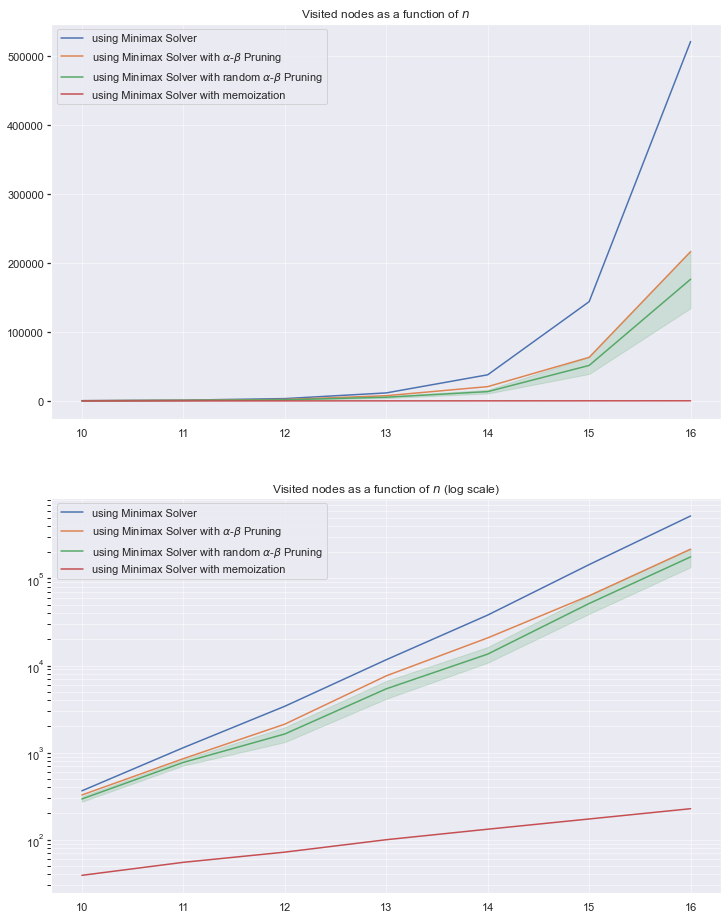

In [300]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import MultipleLocator,AutoMinorLocator

sns.set_theme(style="darkgrid")

def plot_comparaison_function(interval,solvers,names,iters=None,axs=None,solvers_args={}):
    a,b=interval
    r=len(solvers)
    X=range(a,b)
    Y=[]
    if iters is None:
        iters=[1]*r
    for j,solver in enumerate(solvers):
        solver_args={}
        if j in solvers_args:
            solver_args=solvers_args[j]
        Y.append(np.zeros(iters[j]*(b-a)))
        for k in range(iters[j]):
            for m in X:
                evaluation,steps,v=solver().minimax(State([m]),**solver_args)
                Y[j][m-a+(b-a)*k]=v
        
    if axs is None:
        fig,axs=plt.subplots(2,1,figsize=(12,16))
    for i,ax in enumerate(axs):
        for j,s in enumerate(names):
            sns.lineplot(x=list(range(a,b))*iters[j],y=Y[j],label=f"using {s}",ci="sd",n_boot=10,ax=ax)
        ax.set_title("Visited nodes as a function of $n$ {}".format("" if i==0 else "(log scale)"))
        ax.grid(b=True, which='both', color="white", linewidth=0.5)
        ax.tick_params(axis='y', which='both', direction='out', length=4, left=True)
    return axs


"""
    Estimated execution time: 30-90 seconds
"""

fig,axs=plt.subplots(2,1,figsize=(12,16))
L1,R1=(10,18)
plot_comparaison_function((L1,R1),solvers=[MinimaxSolver,PruningSolver,RandomPruningSolver,MemoizedMinimaxSolver],
                          names=["Minimax Solver",
                                  "Minimax Solver with $\\alpha$-$\\beta$ Pruning",
                                 "Minimax Solver with random $\\alpha$-$\\beta$ Pruning",
                                 "Minimax Solver with memoization"],
                         iters=[1,1,10,1],axs=axs)
axs[1].set(yscale="log")

### 4.2 Naive Minimax vs Memoized Minimax

We will compare the naive minimax with memoized minimax.

> Due to the big difference, we will only use $\log$ scale. Also $U_*(x)=\left(\frac{x-1}{2}\right)^{\frac{x-1}{2}}$

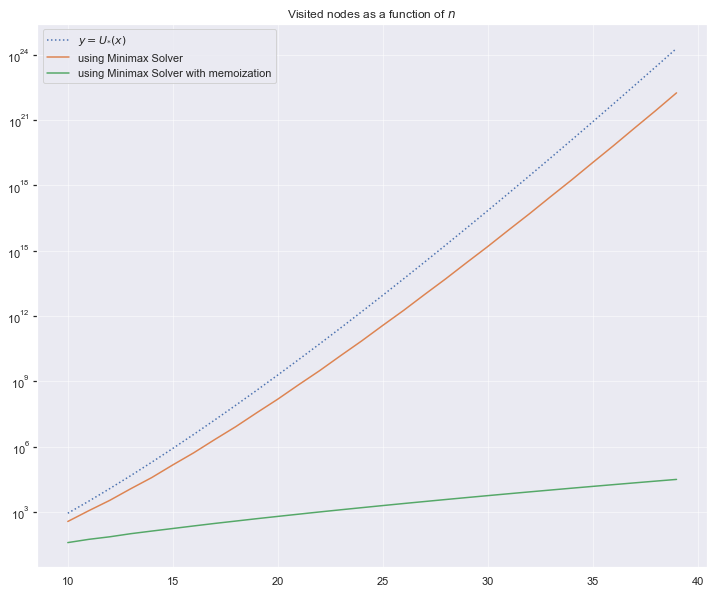

In [311]:
"""
    Estimated execution time: 30-90 seconds
"""
fig,ax=plt.subplots(1,1,figsize=(12,10))
L1,R1=(10,40)
X=np.arange(L1,R1)
sns.lineplot(x=X,y=np.power((X-1)/2,(X-1)/2),ax=ax,label="$y=U_{*}(x)$",linestyle="dotted")
plot_comparaison_function((L1,R1),solvers=[MemoizedMinimaxSolver,MemoizedMinimaxSolver],
                          names=["Minimax Solver","Minimax Solver with memoization"],
                         iters=[1,1],axs=[ax],solvers_args={0:{"retLen":False}})
ax.set(yscale="log")
ax.grid(b=True, which='both', color="white", linewidth=0.5)
ax.tick_params(axis='y', which='both', direction='out', length=4, left=True)

### 4.3 Memoized Minimax vs Memoized Minimax with $\alpha-\beta$ pruning
We will compare the memoized minimax with two implementations of memoized 𝛼−𝛽 pruning:

- The first will visit the adjacent states of the current state within their natural order
- The second will visit the adjacent states of the current state with a random order

The comparaison is based on the cumulative number of times each node is visited, which is here simply the number of nodes visited thanks to memoization.

> Because of the random nature of the second pruning approach, we will run  𝑠=10  simulations and the result is their mean.

> The function $p_*(x)=\frac{1}{4x\sqrt{3}}e^{\pi\sqrt{\frac{2x}{3}}}$ is given as an upper bound

[None]

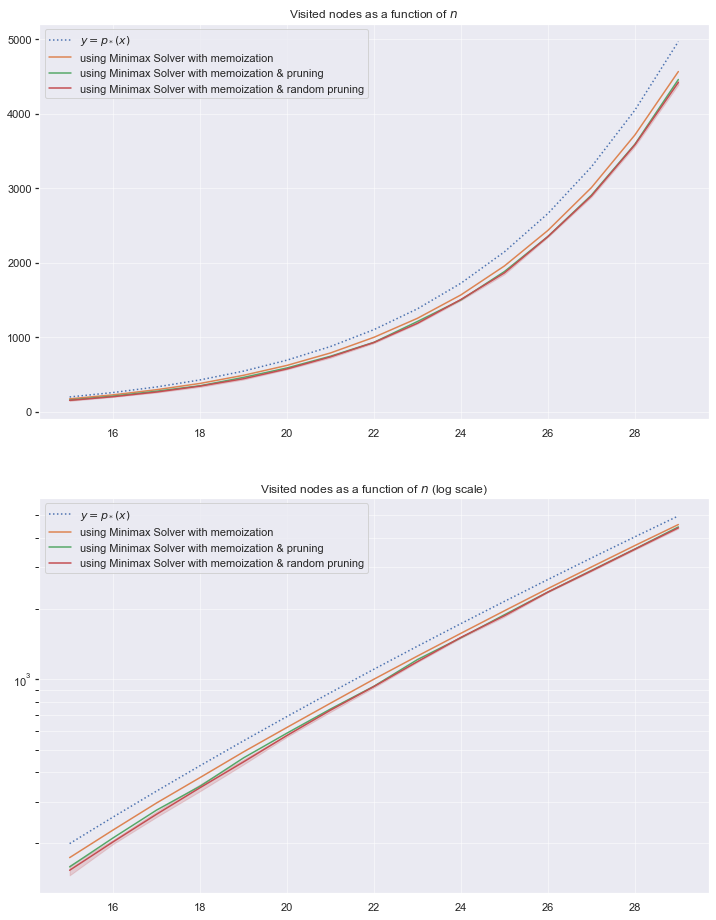

In [313]:
"""
    Estimated execution time: 30-90 seconds
"""
fig,axs=plt.subplots(2,1,figsize=(12,16))
L,R=15,30
X=np.arange(L,R)
for ax in axs:
    sns.lineplot(x=X,y=np.exp(np.pi*np.sqrt(2.*X/3.))/(4.*X*np.sqrt(3)),ax=ax,label="$y=p_*(x)$",linestyle="dotted")
plot_comparaison_function((L,R),[MemoizedMinimaxSolver,MemoizedPruningSolver,RandomMemoizedPruningSolver],
                          ["Minimax Solver with memoization",
                                  "Minimax Solver with memoization & pruning",
                                 "Minimax Solver with memoization & random pruning"],iters=[1,1,5],axs=axs)
axs[1].set(yscale="log")

### 4.4 Comparing $\card\mathcal{V}_n$ and $p(n)$
We will compare the number of states visited on the memoized version of minimax (without pruning), which is equal to $\card\mathcal{V}_n$, to Euler's partition function $p(n)$

#### 4.4.1 Formula for $p(n)$
$$
\forall n\in\mathbb{Z},\quad p(n)=\begin{cases}
    1 &\text{if }n=0\\
    0 &\text{if }n<0\\
    \sum_{k\in\mathbb{Z}^*}(-1)^{k+1}p\left(n-\frac{k(3k-1)}{2}\right) &\text{otherwise}
\end{cases}
$$

This formula can be used to calculate $p(0),\dots,p(n)$ in $\mathcal{O}\left(n\sqrt{n}\right)$

In [167]:
import numpy as np
"""
    Euler's partition function
"""
def p(n:int,retAll:bool=False):
    P=np.zeros(n+1,dtype=np.int64)
    P[0]=1
    for m in range(1,n+1):
        k=1
        while 2*n-k*(3*k-1) >= 0:
            P[m]+=P[m-(k*(3*k-1))//2] if k%2==1 else -P[m-(k*(3*k-1))//2]
            k+=1
        k=-1
        while 2*n-k*(3*k-1)>=0:
            P[m]+=P[m-(k*(3*k-1))//2] if k%2==1 else -P[m-(k*(3*k-1))//2]
            k-=1
    return P if retAll else P[n]

#### 4.4.2 $p(n)-\card\mathcal{V}_n$ vs $n$
We assumed that $\card\mathcal{V}_n=p(n)+o(n)$, the following graph will serve as an evidence for our claim

Text(0.5, 1.0, 'Comparing $y=p(x)-|\\mathcal{V}_x| $ and $y=x$')

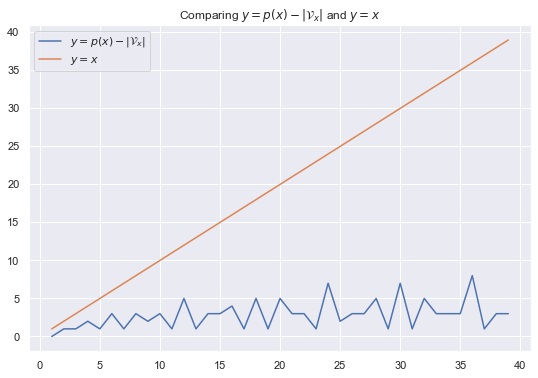

In [314]:
"""
    Estimated execution time: 30-90 seconds
"""
fig,ax=plt.subplots(1,1,figsize=(9,6))
L,R=1,40
X=range(L,R)
Y=np.zeros(R-L)
for m in X:
    evaluation,steps,v=MemoizedMinimaxSolver().minimax(State([m]))
    Y[m-L]=v
sns.lineplot(x=np.arange(L,R),y=p(R,True)[L:R]-Y,ax=ax,label="$y=p(x)-|\mathcal{V}_x| $")
sns.lineplot(x=np.arange(L,R),y=np.arange(L,R),ax=ax,label="$y=x$")
ax.set_title(R"Comparing $y=p(x)-|\mathcal{V}_x| $ and $y=x$")

## 5. Conclusion

- Minimax is an **optimal** algorithm, it always finds the winning move if it exists. Its main issue is its time complexity ( $O(b^m)$ ) where b is the branching factor, m is the maximum depth.
- In our game, The number of states has been found to be almost equal to the number of all possible states. That's a major factor in the execution time.
- Many solutions have been introduced to make this algorithm faster:
    - **$\alpha-\beta$ pruning** : Pruning is a viable technique, it avoids developing branches that won't give us a better result 
    - **Memoization**: Based on storing the States already visited, it reduces the number of visited nodes exponentially ( however it takes some space )
    - **Randomized adjacent states**: Choosing a random adjacent states also helps reducing the execution time
- To get the best result. it's best to use all these methods together